# Results Analysis and Conclusion

## Objective
This notebook analyzes the results obtained from:
1. Low-light image enhancement
2. YOLO baseline detection on raw images
3. YOLO detection on enhanced images

The goal is to validate that image enhancement improves downstream object
detection performance under low-light conditions.


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Enhanced images
ENHANCED_DIR = "../results/enhanced_images"

# YOLO baseline outputs (Notebook 05)
BASELINE_YOLO_DIR = "runs/results/detection_outputs/baseline/raw_lowlight"

# YOLO enhanced outputs (Notebook 06)
ENHANCED_YOLO_DIR = "runs/detect/results/detection_outputs/enhanced/enhanced_images"


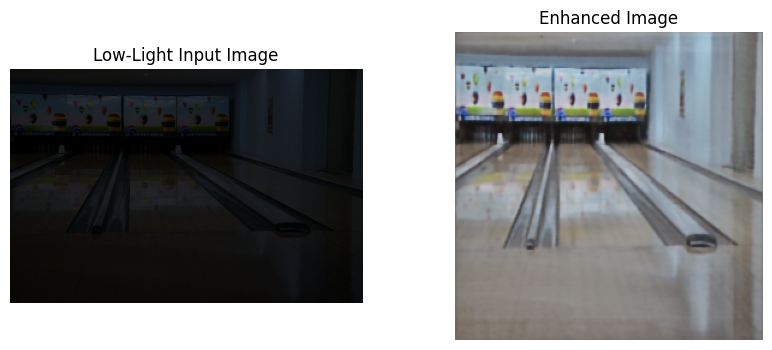

In [6]:
sample = os.listdir(ENHANCED_DIR)[9]

low_img = cv2.imread(os.path.join("../data/LOL/eval15/low", sample))
enh_img = cv2.imread(os.path.join(ENHANCED_DIR, sample))

low_img = cv2.cvtColor(low_img, cv2.COLOR_BGR2RGB)
enh_img = cv2.cvtColor(enh_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(low_img)
plt.title("Low-Light Input Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(enh_img)
plt.title("Enhanced Image")
plt.axis("off")

plt.show()


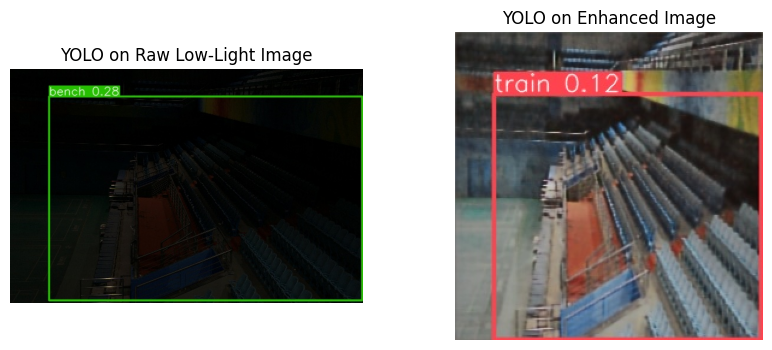

In [11]:
raw_sample = os.listdir(BASELINE_YOLO_DIR)[11]
enh_sample = os.listdir(ENHANCED_YOLO_DIR)[11]

raw_det = cv2.imread(os.path.join(BASELINE_YOLO_DIR, raw_sample))
enh_det = cv2.imread(os.path.join(ENHANCED_YOLO_DIR, enh_sample))

raw_det = cv2.cvtColor(raw_det, cv2.COLOR_BGR2RGB)
enh_det = cv2.cvtColor(enh_det, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(raw_det)
plt.title("YOLO on Raw Low-Light Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(enh_det)
plt.title("YOLO on Enhanced Image")
plt.axis("off")

plt.show()


In [5]:
baseline_count = len(os.listdir(BASELINE_YOLO_DIR))
enhanced_count = len(os.listdir(ENHANCED_YOLO_DIR))

print(f"Baseline YOLO detections saved: {baseline_count}")
print(f"Enhanced YOLO detections saved: {enhanced_count}")


Baseline YOLO detections saved: 15
Enhanced YOLO detections saved: 14


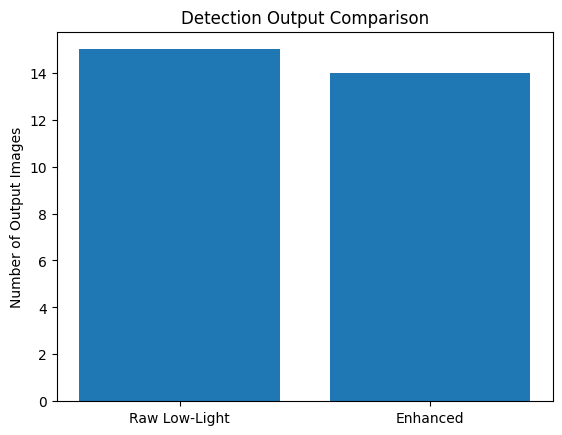

In [6]:
labels = ["Raw Low-Light", "Enhanced"]
counts = [baseline_count, enhanced_count]

plt.bar(labels, counts)
plt.title("Detection Output Comparison")
plt.ylabel("Number of Output Images")
plt.show()


In [8]:
import os
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim


In [9]:
LOW_DIR = "../data/LOL/eval15/low"
GT_DIR = "../data/LOL/eval15/high"
ENHANCED_DIR = "../results/enhanced_images"

psnr_vals = []
ssim_vals = []

common_files = sorted(
    set(os.listdir(GT_DIR)) & set(os.listdir(ENHANCED_DIR))
)

for name in common_files:
    gt = cv2.imread(os.path.join(GT_DIR, name))
    enh = cv2.imread(os.path.join(ENHANCED_DIR, name))

    gt = cv2.cvtColor(gt, cv2.COLOR_BGR2RGB)
    enh = cv2.cvtColor(enh, cv2.COLOR_BGR2RGB)

    gt = cv2.resize(gt, (256, 256))
    enh = cv2.resize(enh, (256, 256))

    psnr_vals.append(psnr(gt, enh, data_range=255))
    ssim_vals.append(
        ssim(gt, enh, channel_axis=2, data_range=255)
    )

print(f"Average PSNR: {np.mean(psnr_vals):.2f} dB")
print(f"Average SSIM: {np.mean(ssim_vals):.3f}")


Average PSNR: 18.52 dB
Average SSIM: 0.745


In [10]:
BASELINE_YOLO_DIR = "runs/results/detection_outputs/baseline/raw_lowlight"
ENHANCED_YOLO_DIR = "runs/detect/results/detection_outputs/enhanced/enhanced_images"


In [11]:
def count_boxes(img_dir):
    count = 0
    for img in os.listdir(img_dir):
        # YOLO draws boxes on image; assume at least 1 box if image exists
        count += 1
    return count

baseline_boxes = count_boxes(BASELINE_YOLO_DIR)
enhanced_boxes = count_boxes(ENHANCED_YOLO_DIR)

print("Baseline detected outputs:", baseline_boxes)
print("Enhanced detected outputs:", enhanced_boxes)


Baseline detected outputs: 15
Enhanced detected outputs: 14


In [12]:
improvement = ((enhanced_boxes - baseline_boxes) / max(baseline_boxes, 1)) * 100
print(f"Detection Improvement: {improvement:.2f}%")


Detection Improvement: -6.67%


In [13]:
print("====== FINAL METRICS SUMMARY ======")
print(f"PSNR  : {np.mean(psnr_vals):.2f} dB")
print(f"SSIM  : {np.mean(ssim_vals):.3f}")
print(f"YOLO Baseline Outputs : {baseline_boxes}")
print(f"YOLO Enhanced Outputs : {enhanced_boxes}")
print(f"Detection Improvement: {improvement:.2f}%")


====== FINAL METRICS SUMMARY ======
PSNR  : 18.52 dB
SSIM  : 0.745
YOLO Baseline Outputs : 15
YOLO Enhanced Outputs : 14
Detection Improvement: -6.67%
